# Composición de diagramas de bode

In [1]:
from sympy.abc import s
from sympy import symbols, Rational as R_, \
     I, arg, plot as splot, log, pi, Function, \
     Eq, latex
from sympy.plotting import PlotGrid
from pprint import pprint
from bode import complex_conjugate_simple_zero, \
                 real_negative_simple_zero, \
                 complex_conjugate_simple_pole, \
                 real_negative_simple_pole, \
                 real_null_simple_zero, \
                 Rational, split_conjugates
from utils import splot_multiple as smplot
from matplotlib import pyplot as plt
from functools import reduce
import sympy.physics.units as u
from IPython.display import display

In [2]:
L = R_("1/5") * u.henry
R = 1*u.ohm
w = symbols("\omega", real=True, positive=True)

H_s = (s*L)/(R+s*L)
H_s_u = u.convert_to(H_s.subs(s, s/u.s), u.V).simplify()
display(Eq(Function("H")(s),H_s),
        Eq(Function("H")(s*u.s),H_s_u))
H_w_u = H_s_u.subs(s, w*I)
display(abs(H_w_u).simplify())
# 20*log(abs(H_w_u)
#splot(abs(H_w_u), (w, 10**-2, 10**2), ylim=(-1, 2), xscale="log", yscale="log")
#splot(arg(H_w_u), (w, 10**-2, 10**2), ylim=(0, pi/2), xscale="log")


Eq(H(s), henry*s/(5*(henry*s/5 + ohm)))

Eq(H(second*s), s/(s + 5))

\omega/sqrt(\omega**2 + 25)

Eq(H(\omega), 4*(I*\omega + 2)*(I*\omega + 5000)/((I*\omega + 20)*(I*\omega + 1000)))

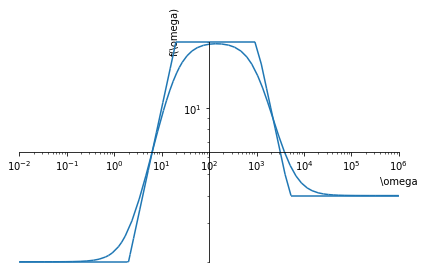

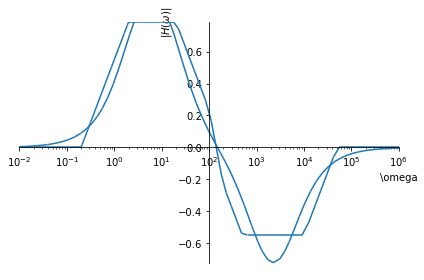

Piecewise((0, \omega < 0.2), (pi*(log(\omega) + 1.6094379124341)/(2*(1.6094379124341 + log(20))), \omega < 20), (pi/2, True)) - Piecewise((0, \omega < 2.0), (pi*(log(\omega) - 0.693147180559945)/(2*(-0.693147180559945 + log(200))), \omega < 200), (pi/2, True)) - Piecewise((0, \omega < 100.0), (pi*(log(\omega) - 4.60517018598809)/(2*(-4.60517018598809 + log(10000))), \omega < 10000), (pi/2, True)) + Piecewise((0, \omega < 500.0), (pi*(log(\omega) - 6.21460809842219)/(2*(-6.21460809842219 + log(50000))), \omega < 50000), (pi/2, True))

In [3]:
H_w_u = 4*((I*w+2)*(I*w+5000))/((I*w+20)*(I*w+1000))
display(Eq(Function("H")(w), H_w_u.simplify()))
zero_1 = real_negative_simple_zero(-2, w)
zero_2 = real_negative_simple_zero(-5000, w)
pole_1 = real_negative_simple_pole(-20, w)
pole_2 = real_negative_simple_pole(-1000, w)
k = 4 * zero_1[0] * zero_2[0] * pole_1[0] * pole_2[0]
total_abs = k * zero_1[-1][0] * zero_2[-1][0] * pole_1[-1][0] * pole_2[-1][0]
total_arg = arg(k) + zero_1[-1][1] + zero_2[-1][1] + pole_1[-1][1] + pole_2[-1][1]
splot(abs(H_w_u), total_abs, (w, .01, 1000000), xscale="log", yscale="log")
splot(arg(H_w_u), total_arg, (w, .01, 1000000), xscale="log", ylabel=r"$|H(\omega)|$", ylim=(-pi/4, pi/4))
display(total_arg)

Eq(H(\omega), (I*\omega - 10*I)*(I*\omega + 10*I))

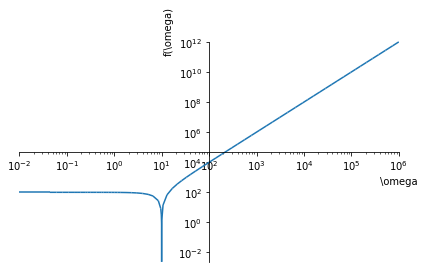

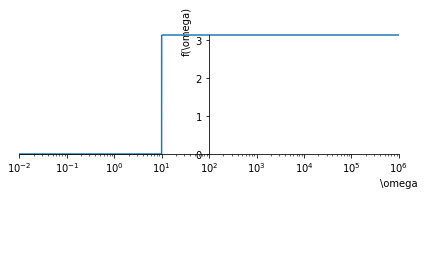

In [4]:
H_w_u = ((I*w + I*10)*(I*w - I*10))
display(Eq(Function("H")(w), H_w_u))
#aprox = complex_conjugate_simple_zero(I*10, w)
splot(abs(H_w_u), (w, .01, 1000000), xscale="log", yscale="log")
splot(arg(H_w_u), (w, .01, 1000000), xscale="log", ylim=(-pi, pi+0.1))
#splot(aprox[0]*aprox[2][0], (w, .01, 1000000), xscale="log", yscale="log")
#splot(aprox[2][1], (w, .01, 1000000), xscale="log", ylim=(-pi, pi+0.1))

Eq(H(\omega), I*\omega + 10)

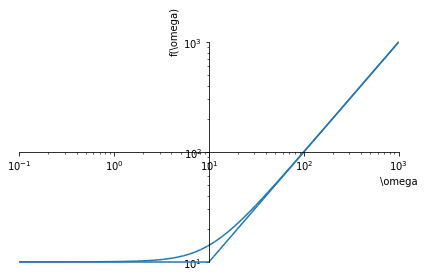

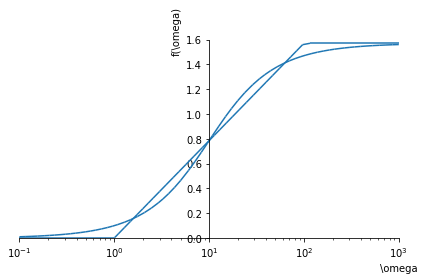

10*Piecewise((1, \omega < 10), (\omega/10, True))

Piecewise((0, \omega < 1.0), (pi*log(\omega)/(2*log(100)), \omega < 100), (pi/2, True))

In [5]:
zero = -10
H_w_u = ((I*w - zero))
display(Eq(Function("H")(w), H_w_u))
aprox = real_negative_simple_zero(zero, w)
splot(abs(H_w_u), aprox[0]*aprox[-1][0], (w, .1, 1000), xscale="log", yscale="log")
splot(arg(H_w_u), aprox[-1][1], (w, .1, 1000), xscale="log", ylim=(0, pi/2+0.1))
display(aprox[0]*aprox[-1][0])
display(aprox[-1][1])

-900*\omega**2/((I*\omega + 1)**2*(I*\omega + 10 - 30*I)*(I*\omega + 10 + 30*I))

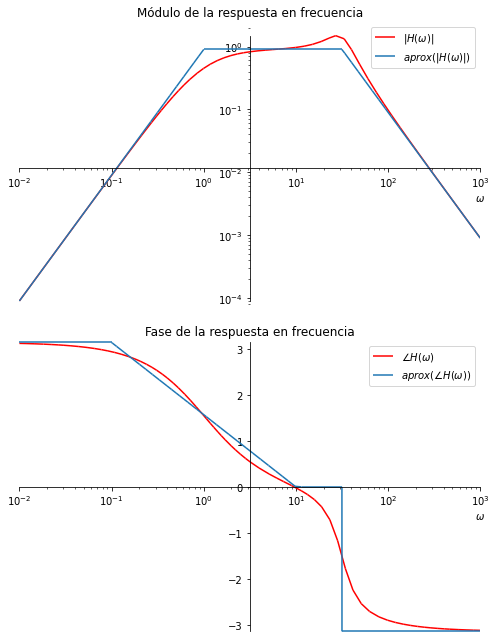

In [6]:
H_w_u = 900*((I*w)**2)/((((I*w)+1)**2)*((I*w)+10+30*I)*((I*w)+10-30*I))
display(H_w_u)
zeros = [real_null_simple_zero(2, w)]
poles = [real_negative_simple_pole(-1, w)] * 2 + [complex_conjugate_simple_pole(-10-30*I, w)]
k = reduce(lambda accum, element: accum * element[0], zeros + poles, 900)
total_abs = reduce(lambda accum, element: accum*element[-1][0], zeros + poles, k)
total_arg = reduce(lambda accum, element: accum+element[-1][1], zeros + poles, arg(k))
#splot(abs(H_w_u), total_abs, (w, .01, 1000000), xscale="log", yscale="log")
plt.rcParams['figure.figsize'] = 7, 9 #Plot Size
w_lim = .01, 1000
phase_figure = smplot(
    (arg(H_w_u), dict(label=r"${\angle}H(\omega)$", line_color="red")), 
    (total_arg, dict(label=r"$aprox({\angle}H(\omega))$")),
    ((w,) + w_lim, None), plotf=splot,
    xscale="log", ylim=(-pi*1.01, pi*1.01), legend=True, xlabel=r"$\omega$", ylabel="",
    title="Fase de la respuesta en frecuencia", show=False
)

abs_figure = smplot(
    (abs(H_w_u), dict(label=r"$|H(\omega)|$", line_color="red")),
    (total_abs, dict(label=r"$aprox(|H(\omega)|)$")), ((w,) + w_lim, None), plotf=splot,
    xscale="log", yscale="log", legend=True, xlabel=r"$\omega$", ylabel="",
    title="Módulo de la respuesta en frecuencia", show=False
)

PlotGrid(2, 1, abs_figure, phase_figure)

In [7]:
sys = Rational.from_dict({0: 2, -1: -2, -10-30*I: -1, -10+30*I: -1}, 900)
split_conjugates()


TypeError: split_conjugates() missing 1 required positional argument: 'rational'